In [1]:
#Dependencies

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
import csv

In [3]:
# Select file and identify columns to be removed in a new output

input_file = './Resources/food_loss_2010.csv'
output_file = './Resources/output_food_loss_2010.csv'
cols_to_remove = [2, 7, 8, 9, 10, 11, 13, 14, 15, 16 , 17, 18, 19, 20, 21] 

In [4]:
# Reverse so we remove from the end first

cols_to_remove = sorted(cols_to_remove, reverse=True) 

# Current amount of rows processed

row_count = 0 



with open(input_file, "r") as source:
    reader = csv.reader(source)
    with open(output_file, "w", newline='') as result:
        writer = csv.writer(result)
        for row in reader:
            row_count += 1
            print('\r{0}'.format(row_count), end='') 
            for col_index in cols_to_remove:
                del row[col_index]
            writer.writerow(row)

1060

In [5]:
#Import dataset

dataset = pd.read_csv('./Resources/output_food_loss_2010.csv')

In [6]:
#Confirming number of rows and columns

dataset.shape

(1059, 7)

In [7]:
#Checking the statistical details

dataset.describe()

,geographicaream49,measureditemcpc,timepointyears,loss_per_clean
count,1059.000000,1059.000000,1059.0,1059.000000
mean,415.931067,1580.243022,2010.0,7.010815
std,256.914603,3671.201066,0.0,8.202766
min,4.000000,111.000000,2010.0,0.000000
25%,208.000000,115.000000,2010.0,1.949550
50%,372.000000,1234.000000,2010.0,4.470000
75%,616.000000,1352.505000,2010.0,9.309450
max,862.000000,21512.000000,2010.0,68.422900


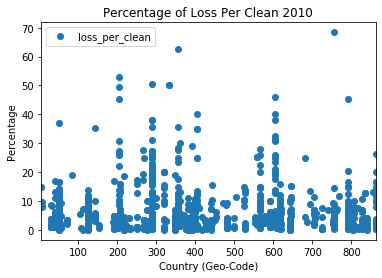

In [19]:
# Plot data points to see if there is any distinct relationship

dataset.plot(x='geographicaream49', y='loss_per_clean', style='o')  
plt.title('Percentage of Loss Per Clean 2010')  
plt.xlabel('Country (Geo-Code)')  
plt.ylabel('Percentage')
plt.savefig("img/lpc10.png") 
plt.show()

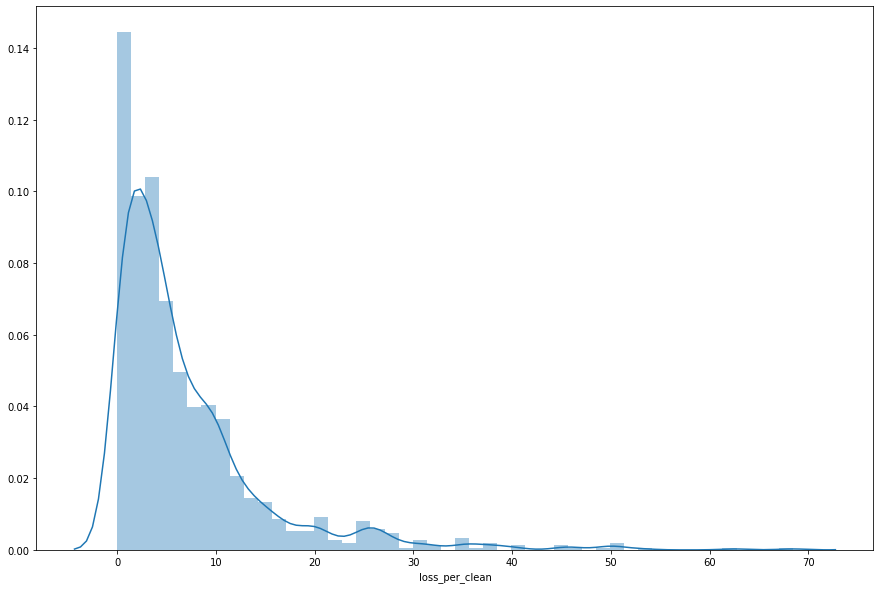

In [20]:
# Plot to determine where the average loss per clean lies (it appears to be between 0 and 30 percent)

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['loss_per_clean'])
plt.savefig("img/lpcbarline.png") 

In [10]:
# Seperate into attributes and labels

X = dataset['geographicaream49'].values.reshape(-1,1)
y = dataset['loss_per_clean'].values.reshape(-1,1)

In [11]:
# Set the training set to test the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# Fit the training set

regressor = LinearRegression()  
    
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#To retrieve the intercept:

print(regressor.intercept_)

#For retrieving the slope:

print(regressor.coef_)

[7.66163447]
[[-0.00133211]]


In [14]:
# Start making your predictions

y_pred = regressor.predict(X_test)

In [15]:
# Compare actual values vs pedicted values

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.0185,7.139449
1,23.0000,7.277988
2,7.5000,6.907662
3,0.9660,7.198061
4,1.3237,7.619007
5,0.7841,6.851713
6,20.3067,6.606606
7,2.7800,7.198061
8,7.7322,7.593697
9,5.3462,6.590620


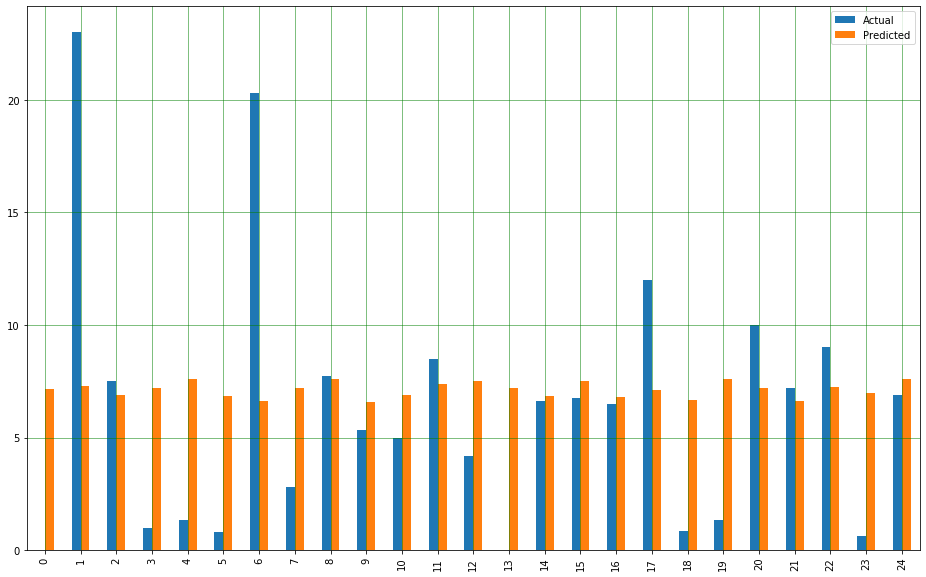

In [21]:
# Set the comparison in a bar graph (used the 25 records)

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig("img/lpcbar.png") 
plt.show()

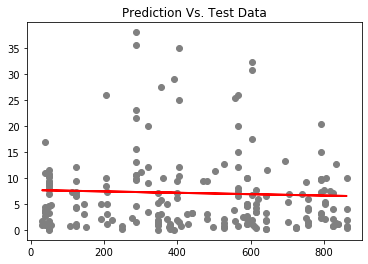

In [22]:
# Visualize in a scatter plot

plt.title('Prediction Vs. Test Data')
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.savefig("img/lpcscatter.png")
plt.show() 

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.268873396358363
Mean Squared Error: 52.52422564096336
Root Mean Squared Error: 7.247359908336508
